In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Mall_Customers.csv") 
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
x=df.iloc[:,3:] 
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


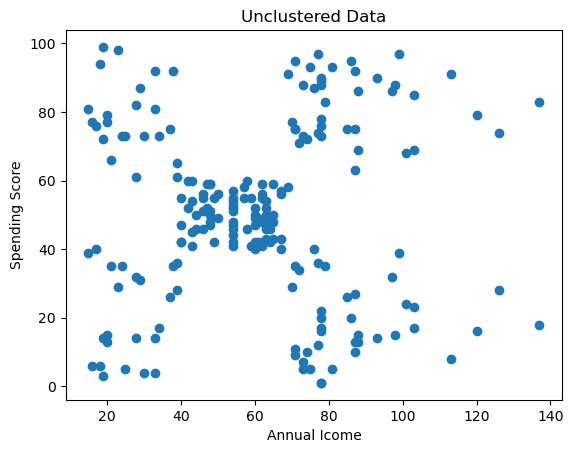

In [5]:
plt.title("Unclustered Data") 
plt.xlabel("Annual Icome") 
plt.ylabel("Spending Score") 
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"]) 
plt.show()

In [6]:
# Firstly, we are supposed to find how many "k" cluster should be there for this dataset 
# we will be using Elbow method and silhoutte score 
# Elbow method -> SSE score is used d
# silhoutte score -> how will does the chosen data points fits in the current chosen cluster is evaluated
# you will get a score and on the basis of that we will chosen the number of clusters for the algorithm  
from sklearn.cluster import KMeans,AgglomerativeClustering 

In [7]:
# test prediction (Not necessary for the real practical directly go for the elbow method)
km=KMeans(n_clusters=6) 
km.fit_predict(x) 
# For context, the below numbers are the labels assigned to the dataEntry indicating to which clusters does it belong to...

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 2, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [8]:
km.inertia_

38797.9027638142

In [9]:
sse=[] #Pushing all the sse(sum squared errors) from 1 no. to clusters to 15 no. of clusters in a list for ploting the elbow plot
for k in range(1,16): 
    km=KMeans(n_clusters=k) 
    km.fit_predict(x) 
    sse.append(km.inertia_) 

sse

[269981.28,
 184131.88502788503,
 106348.37306211118,
 73679.78903948836,
 44454.47647967974,
 37455.98455516028,
 32277.023173884932,
 28707.285166868016,
 26858.695423278274,
 19669.32843887379,
 19490.31929181929,
 18606.602965893755,
 15278.36859193438,
 13193.175734791525,
 12079.72313308037]

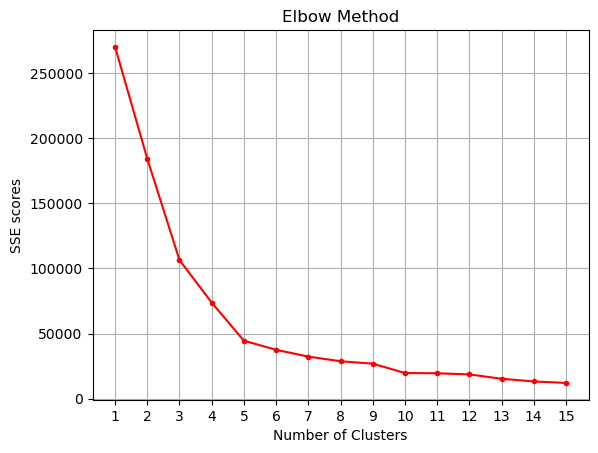

In [10]:
plt.title("Elbow Method") 
plt.xlabel("Number of Clusters") 
plt.ylabel("SSE scores")  
plt.grid() 
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color="red")

In [11]:
from sklearn.metrics import silhouette_score 
sil=[] 
# why start from 2? 
# because for 1 number of clusters there is no points in comparing other clusters but the silhouette checks the distance with 
# other clusters so there will be a logical error right here if we used 1 number of clusters 
for i in range(2,16): 
    km=KMeans(n_clusters=i) 
    labels=km.fit_predict(x) 
    # first parameter->the data used to traning the model,second_parameter->labels generated for the clusters for the "i" particular number!
    score=silhouette_score(x,labels) 
    sil.append(score) 
sil

[np.float64(0.2918426367691145),
 np.float64(0.46761358158775435),
 np.float64(0.4937945814354117),
 np.float64(0.4622576127652011),
 np.float64(0.5375812731362782),
 np.float64(0.505512882799676),
 np.float64(0.45924987052000815),
 np.float64(0.4487430205353891),
 np.float64(0.4319157803720006),
 np.float64(0.4334211252739228),
 np.float64(0.42369624793140886),
 np.float64(0.39864901509255574),
 np.float64(0.41770234564538766),
 np.float64(0.40526567254613155)]

<BarContainer object of 14 artists>

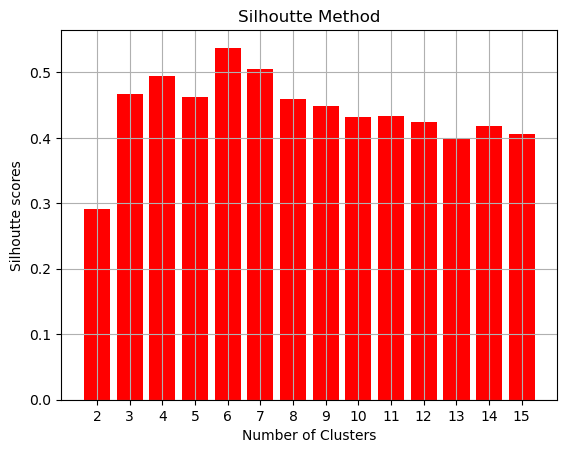

In [12]:
plt.title("Silhoutte Method") 
plt.xlabel("Number of Clusters") 
plt.ylabel("Silhoutte scores")  
plt.grid() 
plt.xticks(range(2,16))
plt.bar(range(2,16),sil,color="red")

In [13]:
km=KMeans(n_clusters=5,random_state=0) 

In [14]:
labels=km.fit_predict(x)

In [15]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [16]:
cent=km.cluster_centers_

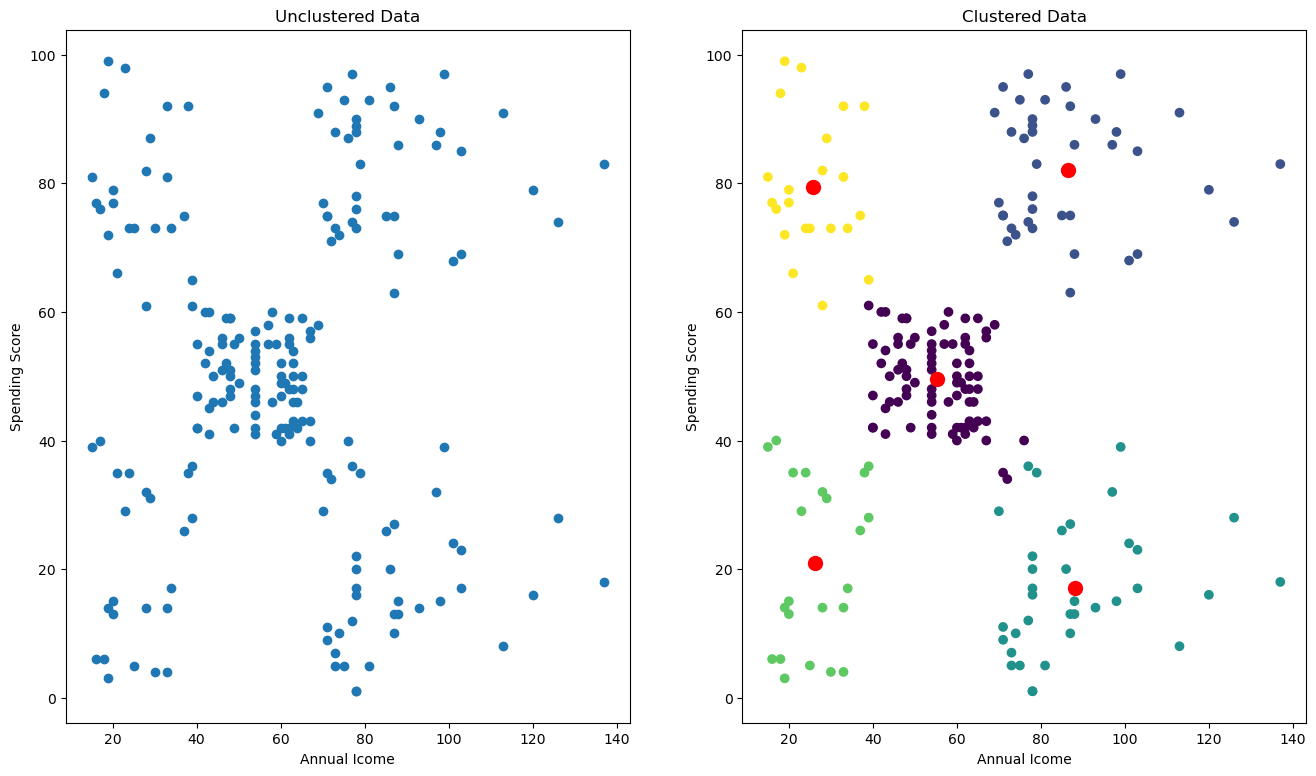

In [17]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title("Unclustered Data")
plt.xlabel("Annual Icome") 
plt.ylabel("Spending Score") 
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"]) 

plt.subplot(1,2,2)
plt.title("Clustered Data")
plt.xlabel("Annual Icome") 
plt.ylabel("Spending Score") 
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels) 
plt.scatter(cent[:,0],cent[:,1],s=100,color="red")  

In [18]:
alg=AgglomerativeClustering(n_clusters=5) 
labels_alg=alg.fit_predict(x) 
labels_alg

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

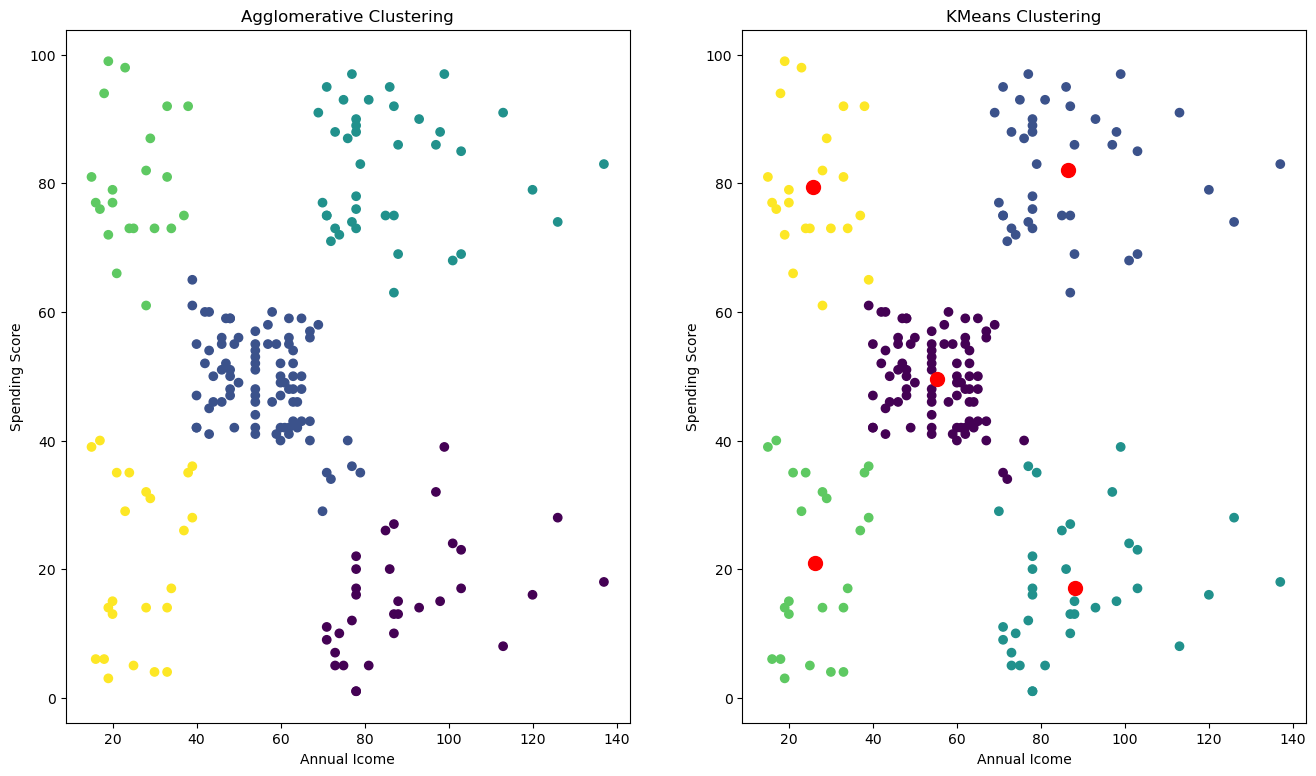

In [19]:
plt.figure(figsize=(16,9)) 
plt.subplot(1,2,1) 
plt.subplot(1,2,1)
plt.title("Agglomerative Clustering")
plt.xlabel("Annual Icome") 
plt.ylabel("Spending Score") 
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels_alg) 


plt.subplot(1,2,2)
plt.title("KMeans Clustering")
plt.xlabel("Annual Icome") 
plt.ylabel("Spending Score") 
plt.scatter(x["Annual Income (k$)"],x["Spending Score (1-100)"],c=labels) 
plt.scatter(cent[:,0],cent[:,1],s=100,color="red")  